In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Descriptive Statistics

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.shape

(768, 9)

## Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

In [13]:
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())

In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

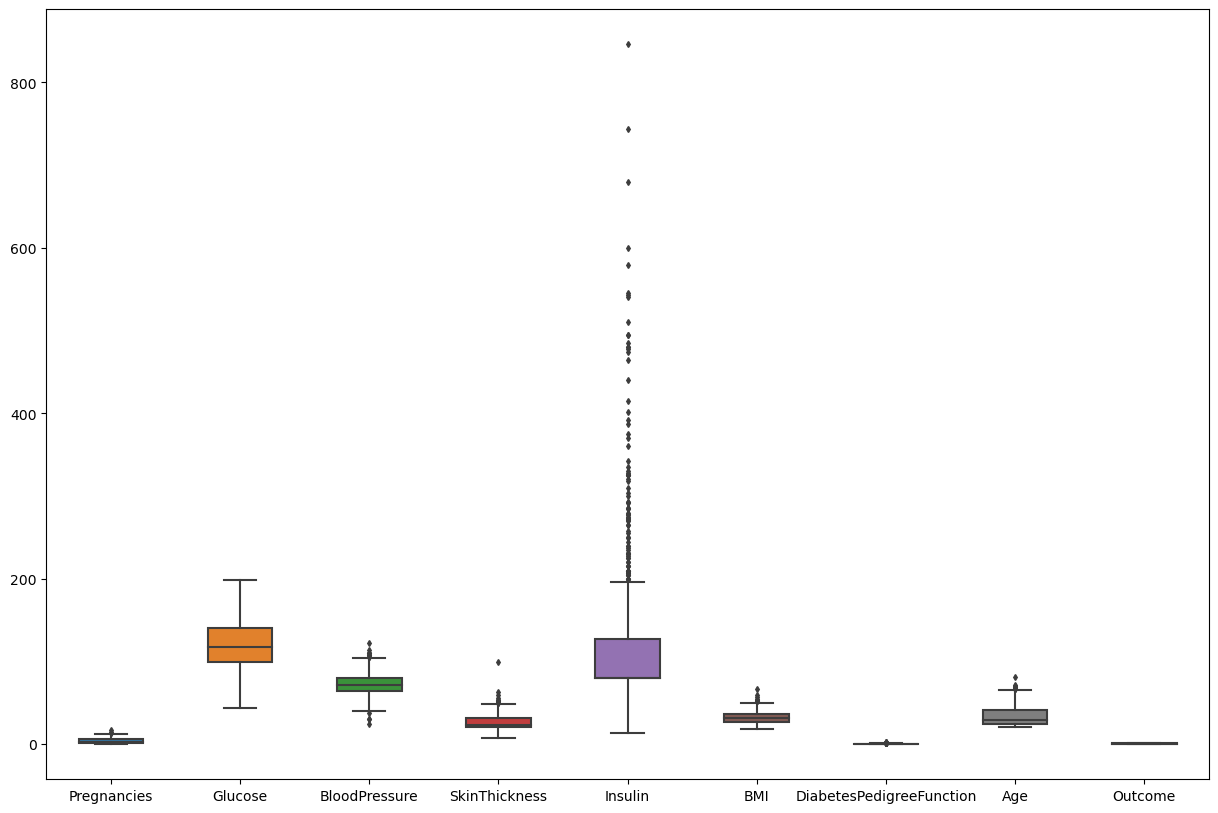

In [15]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width=0.5, ax=ax, fliersize=3)

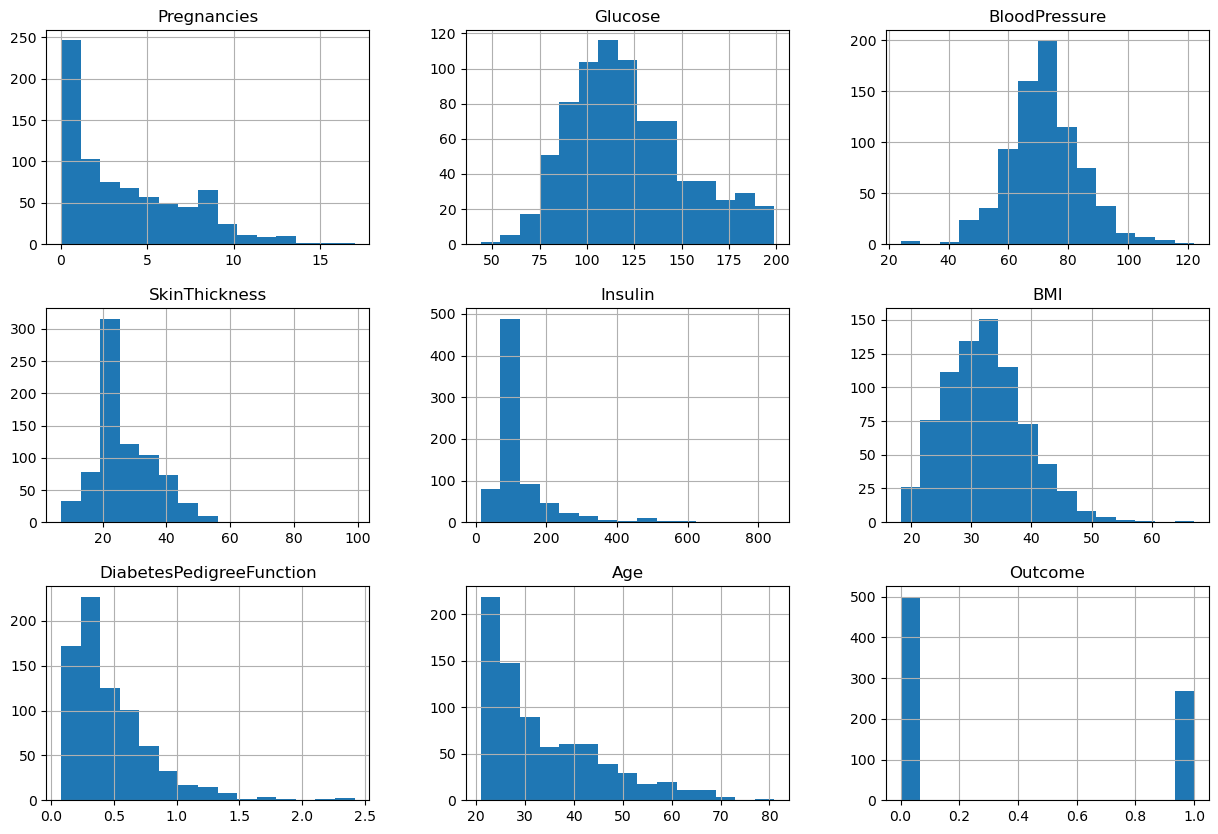

In [16]:
df.hist(bins=15, figsize=(15, 10))
plt.show()

<AxesSubplot:>

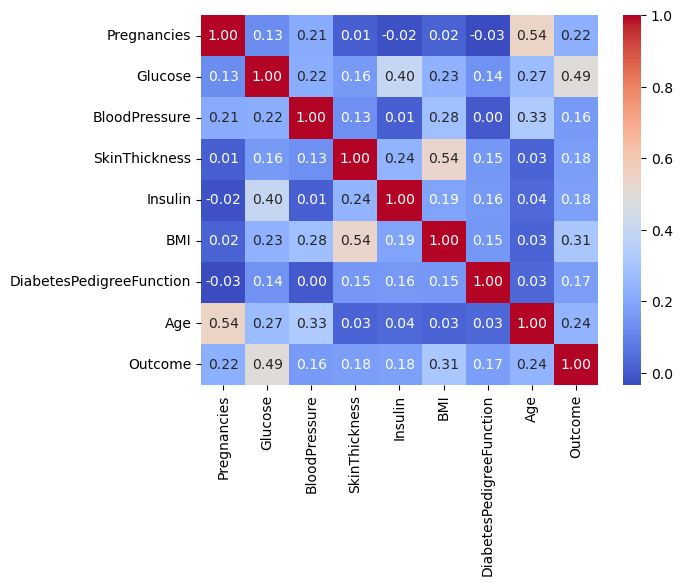

In [18]:
 sns.heatmap(df.corr(),annot = True, cmap='coolwarm', fmt='.2f' )

## Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [19]:
x=df.drop(['Outcome'], axis=1)
y=df['Outcome']

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

## Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [21]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [22]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [23]:
y_pred = classifier.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.7532467532467533


In [25]:
parameters = {
    'criterion': ['gini', 'entropy','log_loss'],  # ID3 typically uses 'entropy'
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [26]:
classify = DecisionTreeClassifier()

In [27]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(classify, param_grid=parameters, cv=5, scoring='neg_mean_squared_error')

In [28]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [30]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [32]:
classify = DecisionTreeClassifier(criterion= 'entropy',
 max_depth= 10,
 min_samples_leaf= 4,
 min_samples_split= 2)

In [33]:
classify.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4)

In [34]:
y_pred = classify.predict(x_test)

In [35]:
print(accuracy_score(y_pred,y_test))

0.7532467532467533


## Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(f'Accuracy Score  : {accuracy_score(y_pred,y_test)}')
print(f'Precision Score : {precision_score(y_pred,y_test)}')
print(f'Recall Score    : {recall_score(y_pred,y_test)}')
print(f'F1 Score        : {f1_score(y_pred,y_test)}')

Accuracy Score  : 0.7532467532467533
Precision Score : 0.6363636363636364
Recall Score    : 0.660377358490566
F1 Score        : 0.6481481481481481


## Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

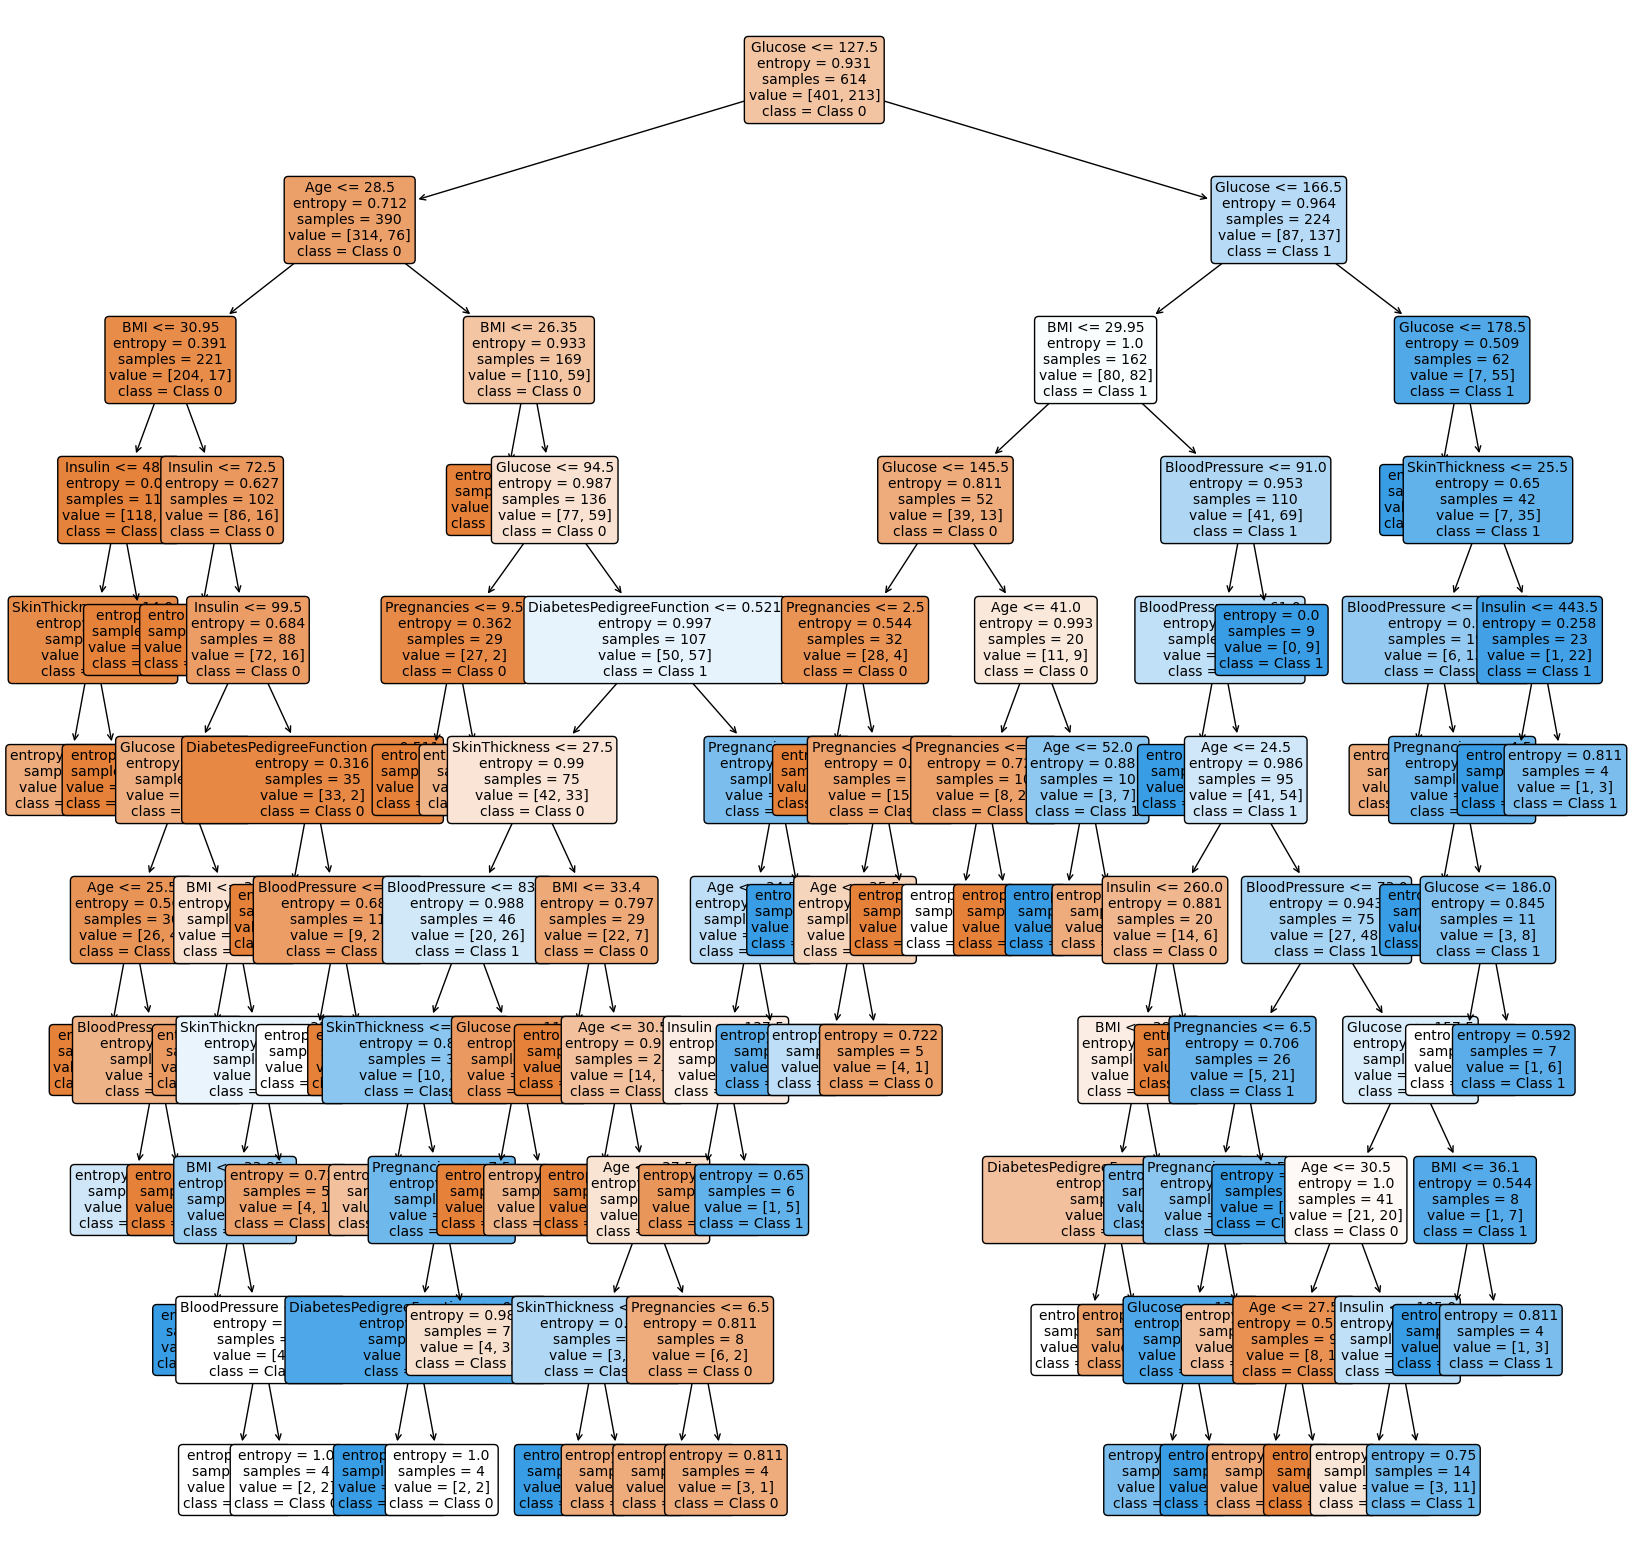

In [46]:
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(20, 20))
plot_tree(classify, feature_names=x.columns, class_names=['Class 0', 'Class 1'], filled=True, rounded=True, fontsize=10)
plt.show()

In [50]:
feature_importances = classify.feature_importances_

In [51]:
# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                    Feature  Importance
1                   Glucose    0.342282
7                       Age    0.167817
5                       BMI    0.157017
0               Pregnancies    0.088499
2             BloodPressure    0.084642
4                   Insulin    0.066295
3             SkinThickness    0.053621
6  DiabetesPedigreeFunction    0.039826


Step 2: Examine the Tree Structure
When you visualize the decision tree, you will see:

Nodes: Each internal node represents a decision based on a feature and a threshold value.
Branches: Each branch represents the outcome of a decision at a node, leading to either another node or a leaf.
Leaves: The terminal nodes (leaves) represent the final class predictions.
Step 3: Identify Important Variables and Thresholds
In the decision tree, the most important variables are those used in the topmost splits. These are the features that the model found most informative in distinguishing between the classes.

Root Node: The feature and threshold at the root node are the most important, as this split affects all the data.
Subsequent Nodes: Features used in the subsequent splits also play a significant role in the classification. The closer a feature is to the root node, the more important it typically is.
For example, if your decision tree is for a diabetes prediction model, you might see something like this:

Root Node Split: Glucose > 127.5

The root node splits on the Glucose feature with a threshold of 127.5. This means the model considers Glucose levels greater than 127.5 as a strong indicator of diabetes.
Subsequent Splits:

If Glucose > 127.5, the next split might be on BMI > 30.5. This indicates that among individuals with high glucose levels, those with a BMI greater than 30.5 are even more likely to have diabetes.
Leaf Nodes:

The leaf nodes will show the final class prediction, for example, Class 1: Diabetes or Class 0: No Diabetes, often with a probability or count of samples.
Step 4: Explain Patterns and Trends
Using the structure of the tree, you can infer patterns:

Feature Importance: The features used at the top levels of the tree are the most important.

In our example, Glucose and BMI would be the most critical factors in predicting diabetes.
Thresholds: The specific threshold values (like Glucose > 127.5) show critical points at which the probability of belonging to one class increases significantly.

A Glucose level above 127.5 might be a clinical marker, indicating a higher risk of diabetes.
Interactions: The decision tree also captures interactions between variables.

For instance, a high Glucose level combined with a high BMI might be particularly indicative of diabetes.
Domain Knowledge: Use your domain knowledge to validate these findings.

In the diabetes example, it's well-known that high glucose levels and high BMI are risk factors for diabetes. If the tree aligns with these medical insights, it adds credibility to the model.
Step 5: Examine the Tree's Depth and Complexity
Tree Depth: A deep tree (many levels) might indicate the model is capturing complex relationships in the data, but it might also be overfitting.
Pruning: Consider whether the tree might be overfitting and whether pruning could simplify it without significantly reducing accuracy.

## Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

Validating a decision tree model involves testing its robustness and generalizability to new data or changes in the dataset. Sensitivity analysis and scenario testing are essential techniques to assess the model's performance under various conditions, exploring potential uncertainties and risks. Here’s how you can perform these tasks:

### Step 1: Apply the Decision Tree to New Data

To validate the model, you should test it on new, unseen data. This data should ideally come from a different source or be held out entirely during the training process.

### Step 2: Sensitivity Analysis

Sensitivity analysis involves systematically varying the inputs (features) to the model to understand how changes in these inputs affect the model’s predictions. This can help identify which variables the model is most sensitive to.

#### Method 1: Perturbing Individual Features

You can perturb individual features (e.g., by adding small noise or shifting values) to see how the model's predictions change.

#### Method 2: Feature Importance through Sensitivity

You can also vary one feature at a time to see how changes in that feature affect the output.

### Step 3: Scenario Testing

Scenario testing involves testing the model under different hypothetical scenarios. These scenarios might represent extreme cases, such as all features having extreme values or missing data.

### Step 4: Analyze and Interpret the Results

After performing the sensitivity analysis and scenario testing, you should:

1. **Compare Performance**: Check how the performance metrics (accuracy, precision, recall, F1 score) change under different conditions. Significant drops in performance might indicate that the model is sensitive to certain changes in the input data.
  
2. **Identify Vulnerabilities**: Identify scenarios where the model's performance significantly degrades. This can highlight areas where the model might be unreliable or where further refinement is needed.
  
3. **Use Domain Knowledge**: Interpret the results using domain knowledge. If certain perturbations or scenarios seem unrealistic or highly unlikely in the real world, the model's performance in those scenarios might be less critical.

4. **Consider Model Robustness**: If the model performs well across various tests, it indicates robustness and reliability. If not, you may need to consider techniques like regularization, pruning, or using a more complex model to improve generalization.

### Summary

By validating the decision tree model through the application to new data, sensitivity analysis, and scenario testing, you can assess its robustness and identify potential risks. This process is crucial in ensuring that the model will perform well not just on the training data but also in real-world situations, even when the data or environment changes.